# Bài tập MODULE 3 - [KNN - 24/08/2024]

### Câu hỏi 3 Hoàn thành đoạn code sau đây để được thứ tự đúng cho bài toán phân loại hoa Iris sử dụng mô hình KNN?

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
# Load the diabetes dataset
iris_X, iris_y = datasets.load_iris(return_X_y=True)
# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(
iris_X,
iris_y,
test_size=0.2,
random_state=42
)
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Build KNN Classifier
# *** Your code here ***
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
# Predict and Evaluate test set
y_pred = knn_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Câu hỏi 5 Sắp xếp các đoạn code sau đây để được thứ tự đúng cho bài toán dự đoán chỉ số bệnh trên bô dữ liệu Diabetes dử dụng mô hình KNN?

In [8]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
# Paragraph A:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Paragraph D:
# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(
diabetes_X,
diabetes_y,
test_size=0.2,
random_state=42
)
# Paragraph B:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Paragraph C:
# Build KNN model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)


KNeighborsRegressor()

### Câu hỏi 7 Hoàn thành đoạn code sau đây cho bài toán phân loại văn bản sử dụng mô hình KNN trên bộ dữ liệu đánh giá phim:

In [1]:
!pip install -q datasets


In [1]:
# Import library

import numpy as np
from datasets import load_dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
# Load IMDB dataset
imdb = load_dataset('imdb')
imdb_train, imdb_test = imdb['train'], imdb['test']
# Convert text to vector using BoW
# *** Your code here ***
vectorizer = CountVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(imdb_train['text']).toarray()
X_test = vectorizer.transform(imdb_test['text']).toarray()
y_train = np.array(imdb_train['label'])
y_test = np.array(imdb_test['label'])
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Build KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
knn_classifier.fit(X_train, y_train)
# predict test set and evaluate
y_pred = knn_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.60444
0.60444


## K-MEAN

In [2]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

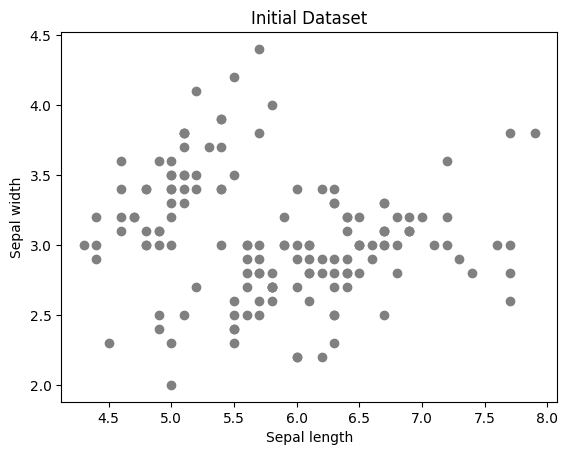

In [3]:
iris_dataset = load_iris()
data = iris_dataset.data
data = iris_dataset.data[:, :2]

# Plot data
plt.scatter(data[:, 0], data[:, 1], c='gray')
plt.title('Initial Dataset')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [4]:
class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.clusters = None

    def initialize_centroids(self, data):
        np.random.seed(42)
        self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum(np.power(x1 - x2, 2)))

    def assign_clusters(self, data):
        distances = np.array([[self.euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])

        return np.argmin(distances, axis=1)

    def update_centroids(self, data):
        return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k)])

    def fit(self, data):
        self.initialize_centroids(data)

        for i in range(self.max_iters):
            self.clusters = self.assign_clusters(data)

            self.plot_clusters(data, i)

            new_centroids = self.update_centroids(data)

            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

        self.plot_final_clusters(data)


    def plot_clusters(self, data, iteration):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o',alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title(f"Iteration {iteration + 1}")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

    def plot_final_clusters(self, data):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o',alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title("Final Clusters and Centroids")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

In [ ]:
kmeans = KMeans(k=2)
kmeans.fit(data)

kmeans = KMeans(k=3)
kmeans.fit(data)

kmeans = KMeans(k=4)
kmeans.fit(data)

In [6]:
data = {"Feature1":[2., 3., 3.5, 8.0, 8.5, 9., 1., 1.5],\
        "Feature2":[3., 3.5, 3., 8., 8.5, 8., 2., 2.5],\
        "Feature3":[1.5, 2., 2.5, 7.5, 8., 8.5, 1., 1.5]    
            }

In [26]:
import pandas as pd
kmeans_data = pd.DataFrame(data)
kmeans_data
ac1 = kmeans_data.values[0]
ac2 = np.array([8., 6., 7.5])
bc1 = kmeans_data.values[2]
bc2 = np.array([1.5, 4.5, 1.5])
cc1 = np.array([6.5, 8.5, 8.0])
cc2 = np.array([1.0, 3.0, 1.0])
dc1 = np.array([2.0, 3.0, 1.5])
dc2 = np.array([1.0, 2.0, 1.0])

def euc_distance(x1, x2):
    return np.sqrt(np.sum(np.power(x1 - x2, 2)))

print(f"A:{euc_distance(ac1, ac2)}")
print(f"B:{euc_distance(bc1, bc2)}")
print(f"C:{euc_distance(cc1, cc2)}")
print(f"D:{euc_distance(dc1, dc2)}")

    



A:9.0
B:2.692582403567252
C:10.464224768228174
D:1.5
